In [32]:
# Importing the packages & modules used in this project
# pd, np and sns are common alias for pandas, numpy & seaborn
# Task 1: collect and transform data
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data

df = pd.read_csv(r"C:\Users\mapul\Downloads\archive\movies.csv")

In [2]:
#look at the data confirm its been loaded
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
# begin process of cleaning data which includes finding missing data (null columns)
# use a for loop, to loop through each column and check if there is missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [60]:
# immediatly we are infromed that the budget has an issue with multiple null
# as the ain focus is the revenue willl arrange the document to reflect the gross revenue. 
# IN decending order from highestet lowest gross
# pd.set_option("display.max_rows", None) to display all the rows 
df.sort_values(by="gross", inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [65]:
# drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [ ]:
# task 2 : Find correlation in database
# what factors directly increase the Gross revenue ?
# My hypothesisis budget and company (that made the film) have highest correlatios

In [42]:
# now to find the actual correlation in the data base, use the .corr() function
# only works on numerical fields, we using the basic correlation method (pearson, kendall & spearman)
df.corr() (# pearson method is the default)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [43]:
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [44]:
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


<AxesSubplot:>

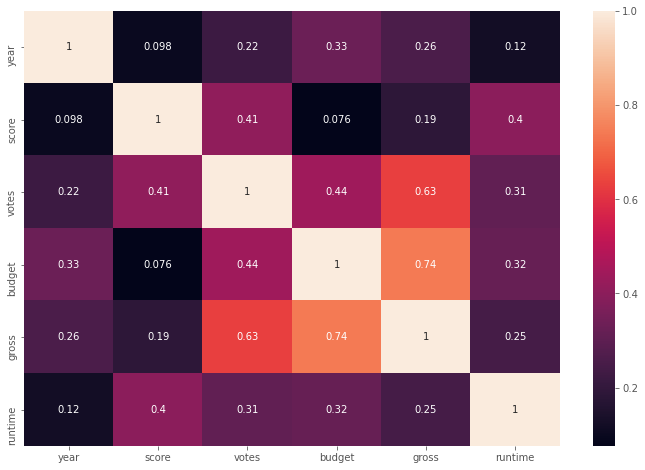

In [45]:
# using the default pearson 
#using the seaborn module (aliased as sns)
# high correlation between budget and gross
correlation_matric = df.corr()
sns.heatmap(correlation_matric, annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

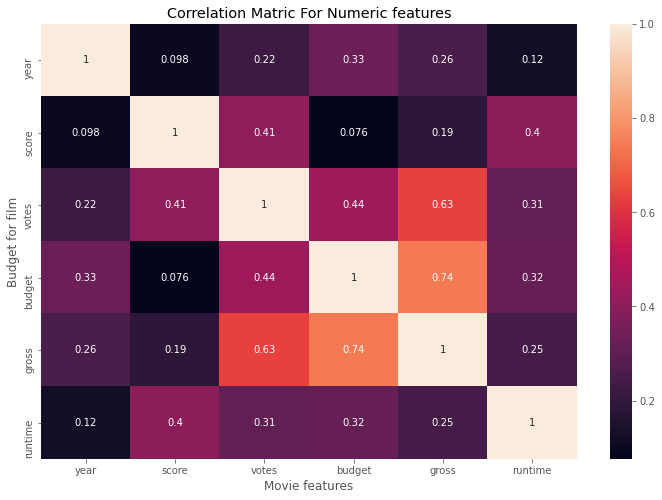

In [46]:
correlation_matric = df.corr()
sns.heatmap(correlation_matric, annot=True)
plt.title("Correlation Matric For Numeric features")
plt.xlabel("Movie features")
plt.ylabel("Budget for film")
plt.show

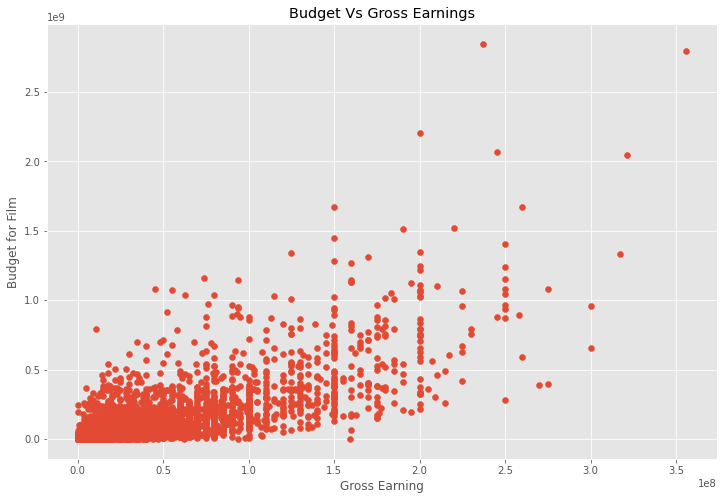

In [35]:
# Task 3: Viualisations
# scatter plot with Budget vs Gross
# as the focus on the dicovery from the correlations

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Gross Earning")
plt.ylabel("Budget for Film")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

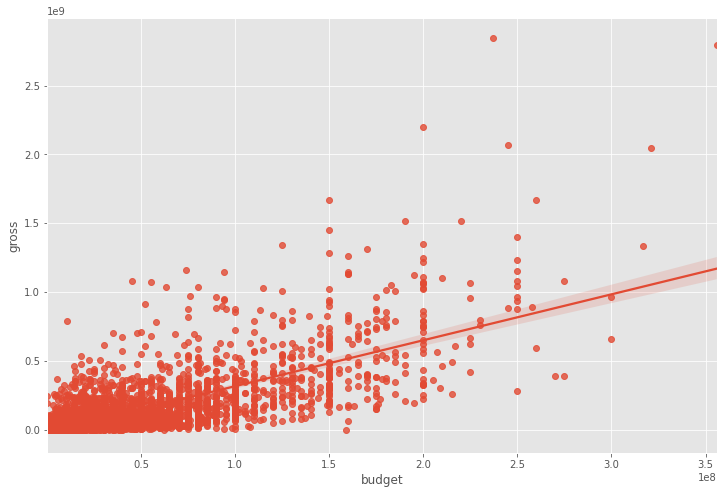

In [29]:
# Regression Plot is what will plot the budget vs the gross
# we willl us the seaborn module
sns.regplot(x="budget", y="gross", data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

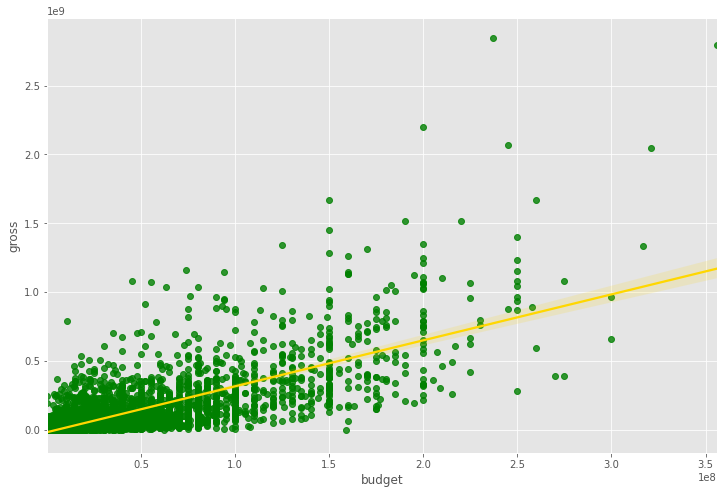

In [66]:
# to imporve the visualisation, change the scatter plot color and the regression line
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"green"}, line_kws={"color":"gold"})

In [61]:
# once again take at look at the dataset 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


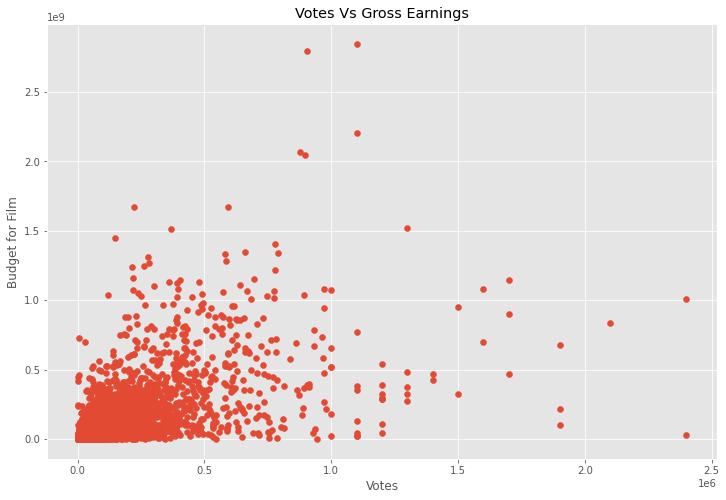

In [50]:
plt.scatter(x=df["votes"], y=df["gross"])
plt.title("Votes Vs Gross Earnings")
plt.xlabel("Votes")
plt.ylabel("Budget for Film")
plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

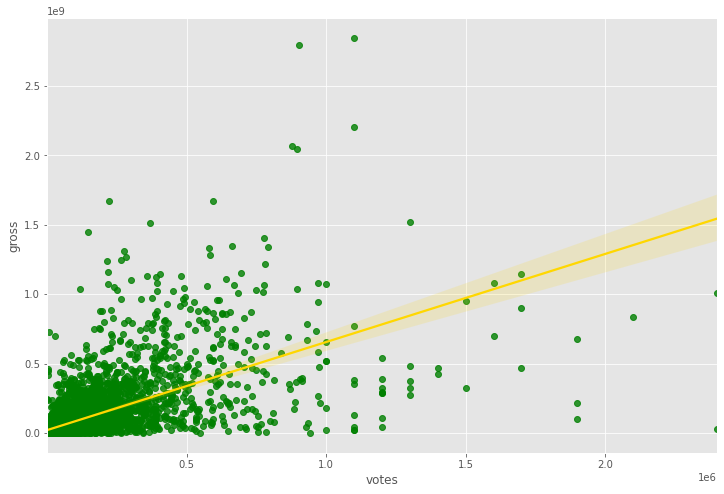

In [67]:
# add regression line using seaborn module to find pattern 
sns.regplot(x="votes", y="gross", data=df, scatter_kws={"color":"green"}, line_kws={"color":"gold"})

In [62]:
# task 4: correlate entire database and Make consultions 
# lets shift and see if the production company affects gross
# as stated before the correlation does not affect "objects" so certain columns were not calculated lets change that 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

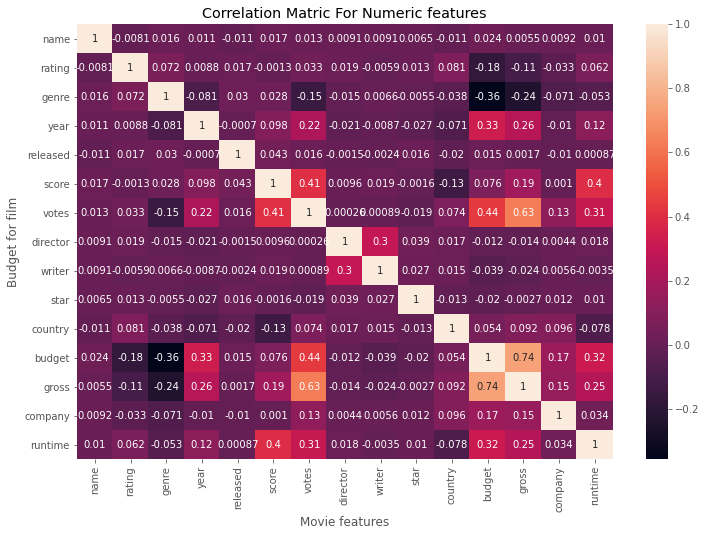

In [56]:
# with all categories being calcluated (objects changed to categories), we can now view the complete picture

correlation_matric = df_numerized.corr()
sns.heatmap(correlation_matric, annot=True)
plt.title("Correlation Matric For Numeric features")
plt.xlabel("Movie features")
plt.ylabel("Budget for film")
plt.show

In [58]:
# lets focus on the highest correlation 
# lets use the unstack function
# We can now take a look at the ones that have a high correlation (> 0.5)

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   star        0.527363
star      company     0.527363
company   writer      0.547126
writer    company     0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587727
gross     company     0.587727
name      company     0.591834
company   name        0.591834
          year        0.601720
year      company     0.601720
released  company     0.607607
company   released    0.607607
writer    star        0.676284
star      writer      0.676284
          director    0.682358
director  star        0.682358
star      name        0.731509
name      star        0.731509
star      gross       0.735612
gross     star        0.735612
director  name        0.745905
name      director    0.745905
writer    director    0.748875
director  writer      0.748875
gross     director    0.750911
director  gross       0.750911
released  star        0.755408
star      released    0.755408
year      star        0.756341
star      year        0.756341
year    

In [ ]:
# In conclusion the following have the higest correlation to the Gross revenue
# the director of the film
# the year released (films released after 2000 have more expose, more facilites to be viewed etcadig)
# the year released and the star involved 
# the writer of the film 
# budget affects gross